<a href="https://colab.research.google.com/github/shahrizod/germany-covid-analysis/blob/main/covid_19_germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import datetime
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from scipy import stats



In [ ]:

covid = pd.read_csv("https://raw.githubusercontent.com/deyin1/covid-19-germany-data/master/covid_de.csv")
demo = pd.read_csv("https://raw.githubusercontent.com/deyin1/covid-19-germany-data/master/demographics_de.csv")

demo = demo.drop_duplicates()
covid = covid.dropna()
demo = demo.dropna()

# covid[(np.abs(stats.zscore(])) < 3)]
# demo[(np.abs(stats.zscore(demo['population'])) < 3)]

In [ ]:
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


In [ ]:
covid

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
691221,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1
691222,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1
691223,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1
691224,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0


To clean these datasets, we first drop any duplicate rows (but only in the demographic dataset), as well as any rows with null values. The cases dataset may have duplicate rows, but this is not an indication that it is erroneous data. 

Before merging the datasets, we consolidated the differently formatted gender columns shared by both datasets into just M or F. 

In [ ]:
demo['gender'] = demo['gender'].apply(lambda x: 'M' if x == 'male' else 'F')
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,F,00-04,261674
1,Baden-Wuerttemberg,F,05-14,490822
2,Baden-Wuerttemberg,F,15-34,1293488
3,Baden-Wuerttemberg,F,35-59,1919649
4,Baden-Wuerttemberg,F,60-79,1182736
...,...,...,...,...
187,Thueringen,M,05-14,92545
188,Thueringen,M,15-34,214553
189,Thueringen,M,35-59,384822
190,Thueringen,M,60-79,264189


The demographic dataset provides us with valuable data: How many people live in each state, but especially the number of people of each gender and age group that live in that state. We now merge on the common columns of state, age group, and gender. 

In [ ]:
df = pd.merge(covid, demo, on=['state', 'age_group', 'gender'], how = 'outer')

# left_on=['state', 'age_group', 'gender'], right_on=['state', 'age_group', 'gender']

# df.drop_duplicates()
df = df.dropna()
df = df.drop_duplicates()
df

,state,county,age_group,gender,date,cases,deaths,recovered,population
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,261674
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,261674
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,261674
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,261674
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,261674
...,...,...,...,...,...,...,...,...,...
675540,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1,57340
675541,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1,57340
675542,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1,57340
675543,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0,57340


Now, we want to observe COVID case trends on a state-level basis. To do this, we constructed a bar graph that took the sum of all confirmed covid cases per state. This is achieved by first grouping the dataframe by state and taking the sum of cases for each state. This is stored in a new dataframe which is then used to construct a bar graph. 

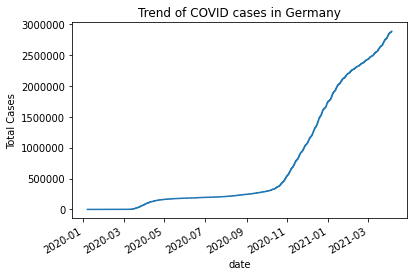

In [ ]:
df['date'] = pd.to_datetime(df['date'])
sort_by_date = df.sort_values('date')
plt.ticklabel_format(style = 'plain', useOffset=False)
sort_by_date.set_index('date')['cases'].cumsum().plot(title= "Trend of COVID cases in Germany", ylabel = 'Total Cases')


Next, we want to take a look at state-level covid case trends. We can first observe the total number of cases in each state. 

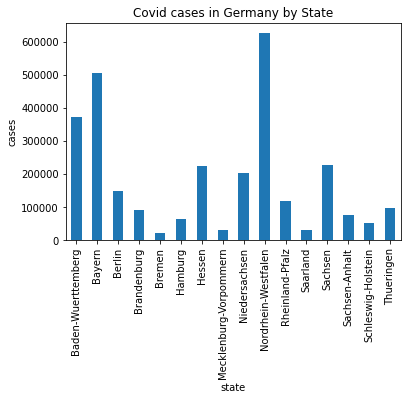

In [ ]:
by_state = df.groupby('state')['cases'].sum();
ax = by_state.plot.bar(ylabel = 'cases', title = 'Covid cases in Germany by State')

As observed from the above graph, Nordrhein-Westfalen has by far the most Covid cases, followed by Bayem and Baden-Wuerttemberg. The states with the least cases include Bremen, Mecklenburg-Vorpommem, and Saarland. 
To further build upon these observations, we create confirmed case graphs for each state. 

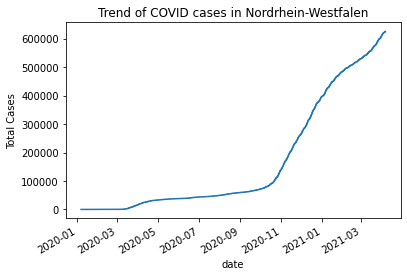

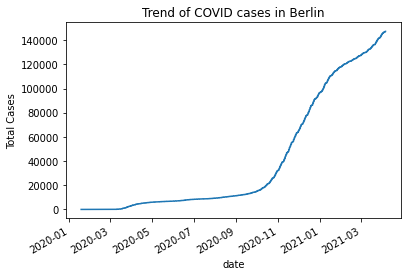

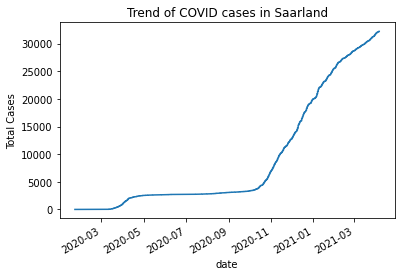

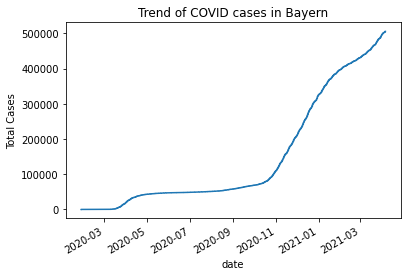

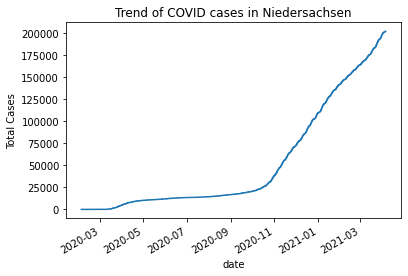

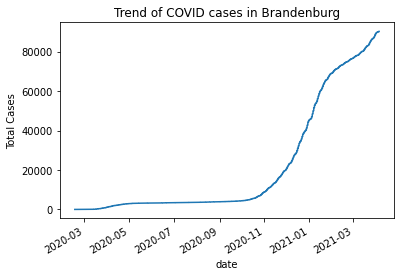

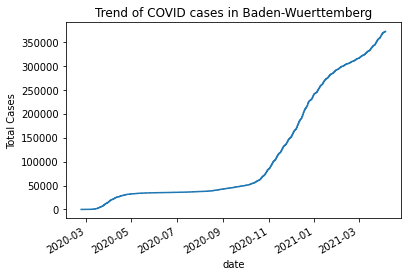

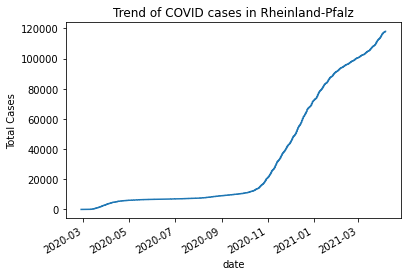

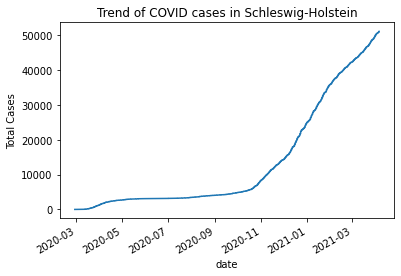

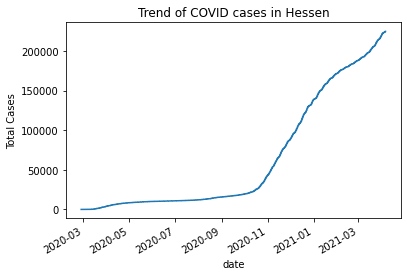

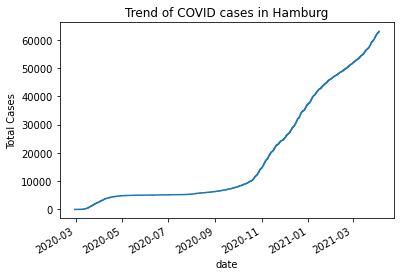

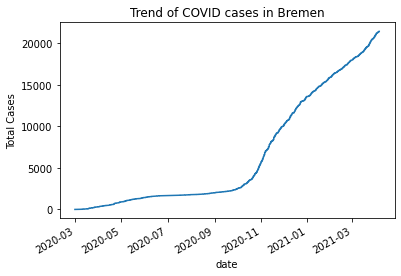

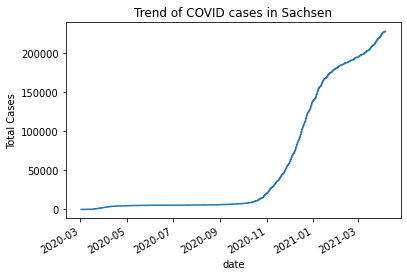

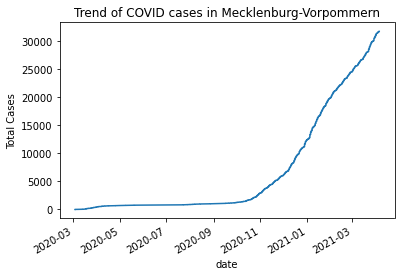

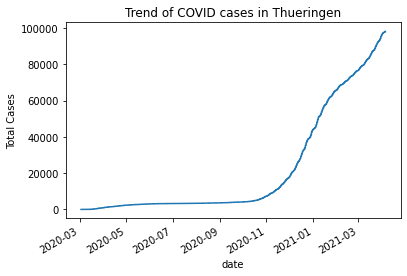

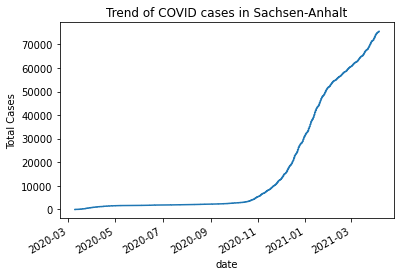

In [ ]:
for i in range(df['state'].unique().size):
  plt.figure()
  by_date = df.sort_values('date')
  state_level = by_date.loc[by_date['state'] == by_date['state'].unique()[i]]
  state_level.set_index('date')['cases'].cumsum().plot(title= str("Trend of COVID cases in " + by_date['state'].unique()[i]), ylabel = 'Total Cases')



plt.show()



As we can see from the state-level trends, every state saw a sharp uptake in COVId cases starting around November of 2020, and these cases would continue to rise in each state well into 2021. 

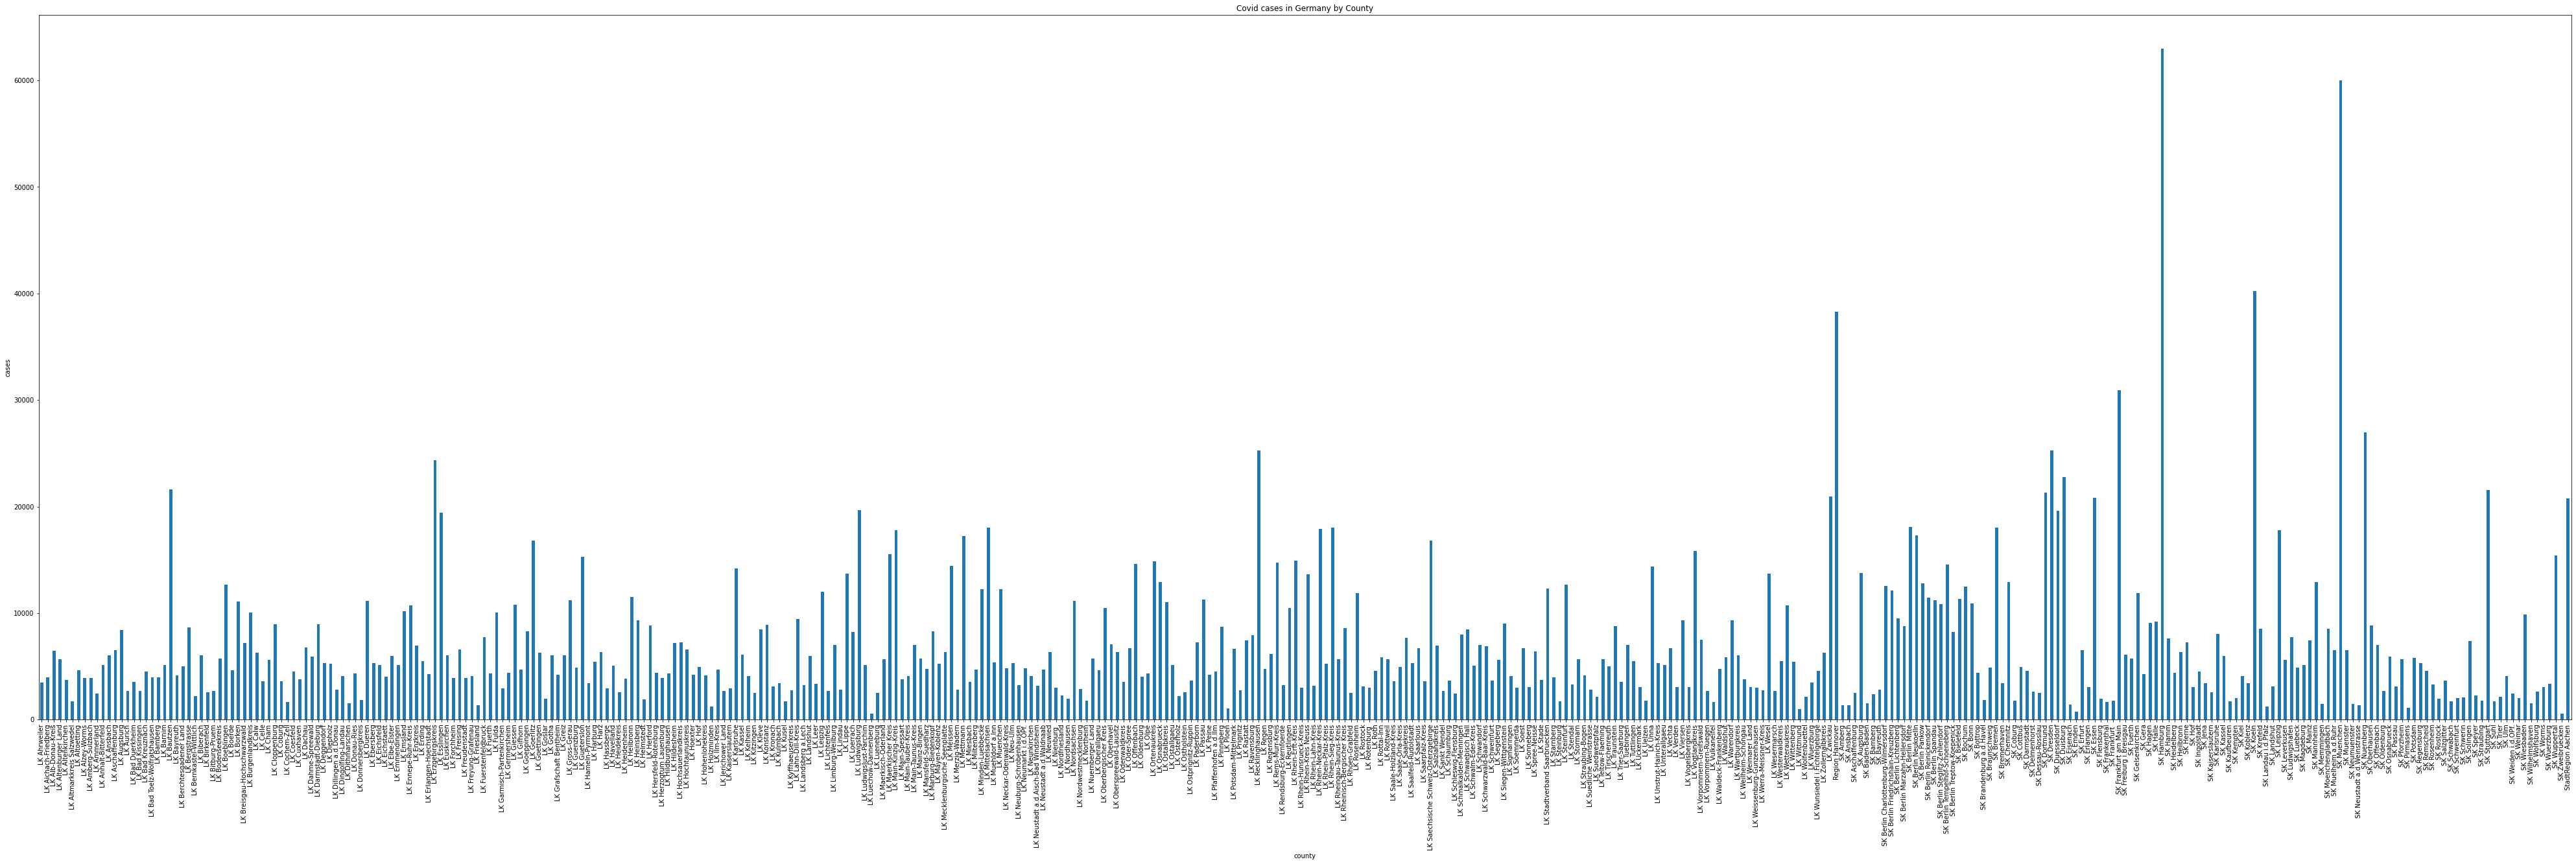

In [ ]:
by_state = df.groupby('county')['cases'].sum();
ax = by_state.plot.bar(ylabel = 'cases', title = 'Covid cases in Germany by County', figsize=(70, 20))

To glean more useful county-level information, we can check out the top 5 and bottom 5 counties in regards to number of cases. 

In [ ]:
county_level = df.groupby('county')['cases'].sum().sort_values(ascending = False)
county_level

county
SK Hamburg               63007
SK Muenchen              60024
SK Koeln                 40244
Region Hannover          38290
SK Frankfurt am Main     30926
                         ...  
LK Ploen                  1040
LK Wittmund                980
SK Emden                   755
LK Luechow-Dannenberg      588
SK Zweibruecken            545
Name: cases, Length: 412, dtype: int64

From this table, we can gather that the 5 counties with the most COVID cases are SK Hamburg, SK Muenchen, SK Koeln, Region Hannover, and SK Frankfurt am Main. The 5 counties with the least cases include LK Ploen, LK Wittmund, SK Emden, LK Luechow-Dannenberg, and finally SK Zweibruecken. 

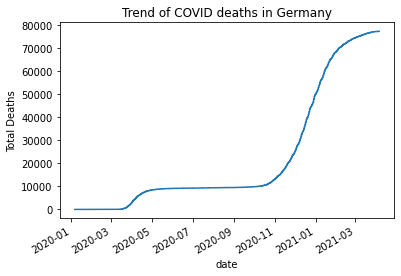

In [ ]:
sort_by_date = df.sort_values('date')
plt.ticklabel_format(style = 'plain', useOffset=False)
sort_by_date.set_index('date')['deaths'].cumsum().plot(title= "Trend of COVID deaths in Germany", ylabel = 'Total Deaths')

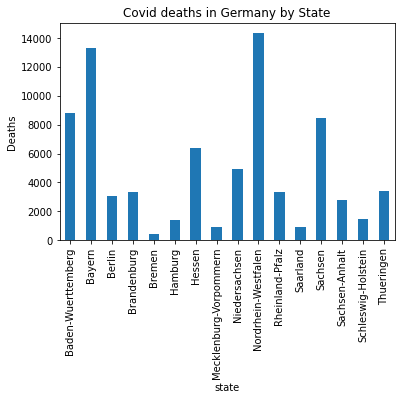

In [ ]:
by_state = df.groupby('state')['deaths'].sum();
ax = by_state.plot.bar(ylabel = 'Deaths', title = 'Covid deaths in Germany by State')

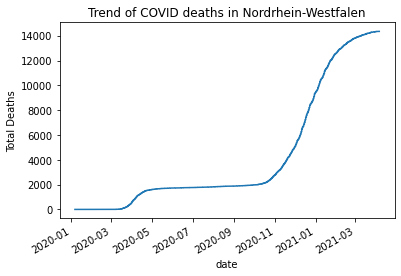

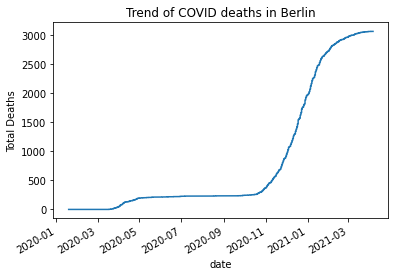

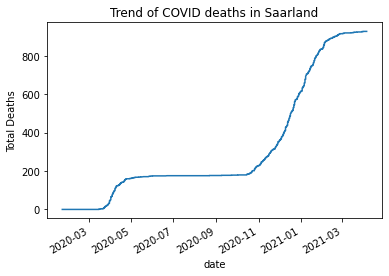

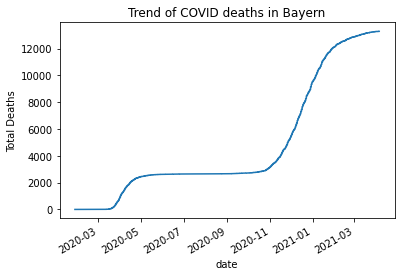

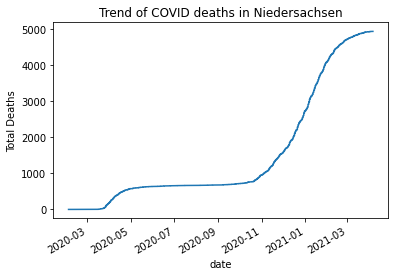

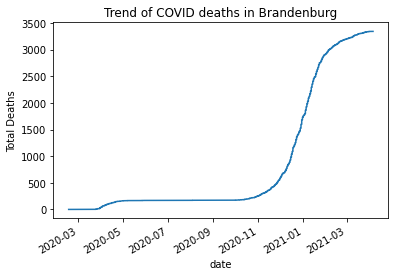

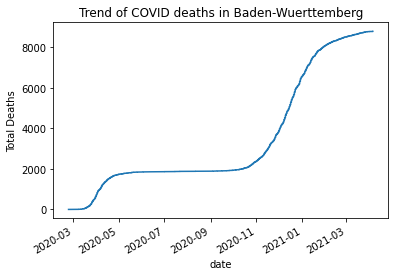

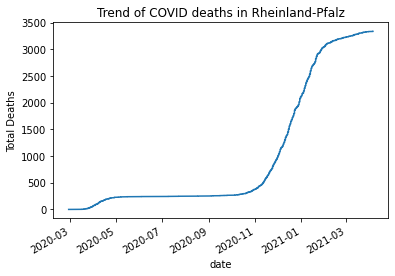

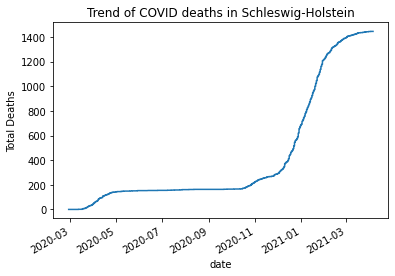

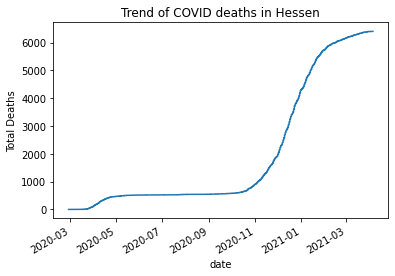

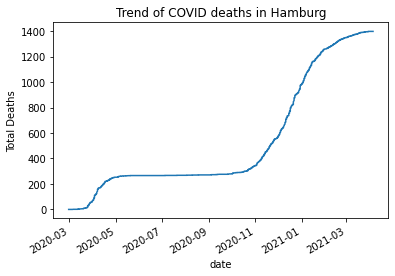

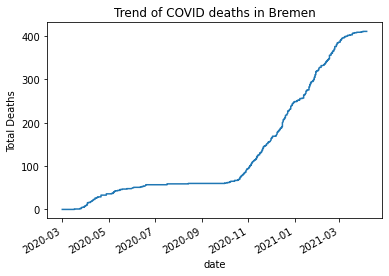

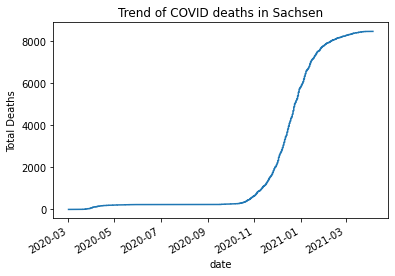

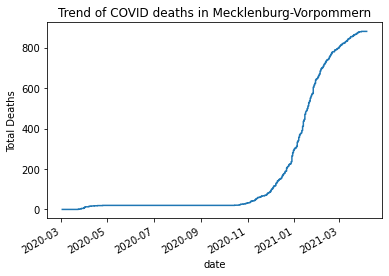

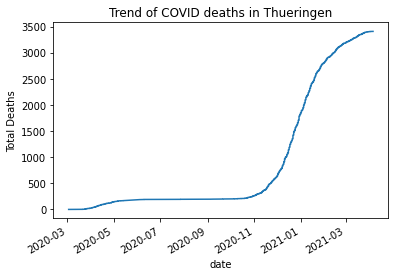

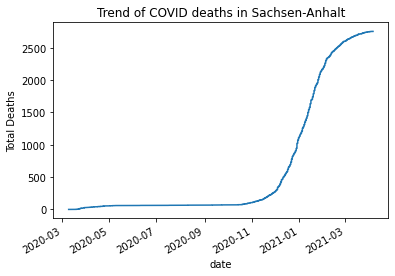

In [ ]:
for i in range(df['state'].unique().size):
  plt.figure()
  by_date = df.sort_values('date')
  state_level = by_date.loc[by_date['state'] == by_date['state'].unique()[i]]
  state_level.set_index('date')['deaths'].cumsum().plot(title= str("Trend of COVID deaths in " + by_date['state'].unique()[i]), ylabel = 'Total Deaths')



plt.show()


In [ ]:
county_level = df.groupby('county')['deaths'].sum().sort_values(ascending = False)
# .sum.pct_change() ? is this correct? 
county_level

county
SK Hamburg         1398
SK Muenchen        1126
LK Goerlitz        1008
SK Dresden          992
Region Hannover     889
                   ... 
SK Neumuenster       22
SK Memmingen         21
SK Amberg            20
SK Emden              7
SK Zweibruecken       4
Name: deaths, Length: 412, dtype: int64

Above is a table that shows us the counties with the top 5 most and least COVID deaths. The counties with the most deaths include SK Hamburg, SK Muenchen, LK Goerlitz, SK Dresden, and Region Hannover. SK Neumuenster, SK Memmingen, SK Amberg, SK Emden, SK Zweibruecken make up the counties with the least COVID deaths. 

Now, we take a look at the distribution of COVID cases among different age groups and genders. 

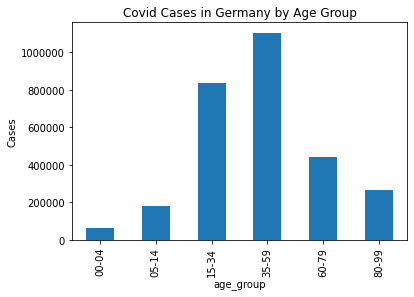

In [ ]:
by_age = df.groupby('age_group')['cases'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
ax = by_age.plot.bar(ylabel = 'Cases', title = 'Covid Cases in Germany by Age Group')

As indicated by the bar graph above, people aged 35-59 comprised the most cases out of any age group. Small children aged 0-4 were the least likely to be affected. 

Next, we observe the distribution of COVID cases among different genders. 

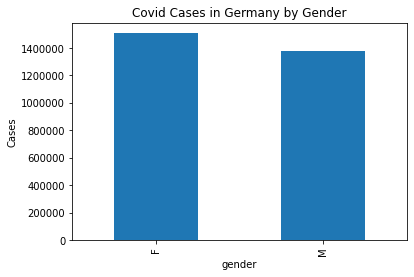

In [ ]:
by_gender = df.groupby('gender')['cases'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
ax = by_gender.plot.bar(ylabel = 'Cases', title = 'Covid Cases in Germany by Gender')

The distribution of cases between women and men were relatively equal. However, females still comprised more of the cases than men. 

Now, we seek to observe the trends in death rates among age groups and genders. 

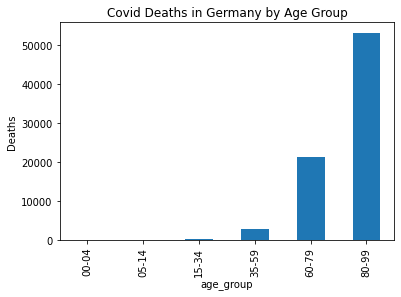

In [ ]:
by_age = df.groupby('age_group')['deaths'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
ax = by_age.plot.bar(ylabel = 'Deaths', title = 'Covid Deaths in Germany by Age Group')

The graph above shows a clear right skew towards older age groups when concerning COVID deaths. The age group with the highest death rate is ages 80-99. This makes sense - the older population is more susceptible to underlying conditions and weaker immune systems, which may lower their chances of fighting off COVID. 

Next, we graph COVID deaths by gender. 

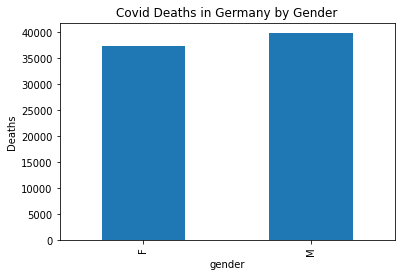

In [ ]:
by_gender = df.groupby('gender')['deaths'].sum();
plt.ticklabel_format(style = 'plain', useOffset=False)
ax = by_gender.plot.bar(ylabel = 'Deaths', title = 'Covid Deaths in Germany by Gender')

An interesting piece of information to glean from this graph is this: Even though females made up more of the total cases in Germany than males, more men died from COVID than did women. 

In [ ]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,population
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,261674
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,261674
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,261674
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,261674
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1,261674
...,...,...,...,...,...,...,...,...,...
675540,Thueringen,SK Weimar,80-99,M,2021-03-03,1,0,1,57340
675541,Thueringen,SK Weimar,80-99,M,2021-03-13,1,0,1,57340
675542,Thueringen,SK Weimar,80-99,M,2021-03-15,1,0,1,57340
675543,Thueringen,SK Weimar,80-99,M,2021-03-31,1,0,0,57340


The R^2 score of the linear regression is  0.18363426177625408


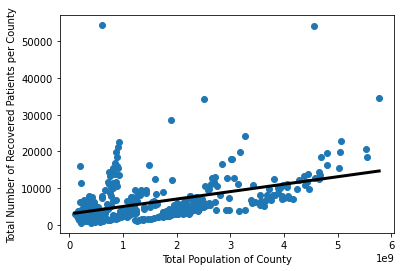

In [ ]:
x = np.array(df.groupby('county')['population'].sum()).reshape(-1,1) #total population by county
y = np.array(df.groupby('county')['recovered'].sum()).reshape(-1,1) #total number of recovered cases by county

lin_reg = LinearRegression()
lin_reg.fit(x,y)

test_x = np.linspace(min(x), max(x)).reshape(-1,1)
pred_y = lin_reg.predict(test_x)

print('The R^2 score of the linear regression is ',lin_reg.score(x, y))

plt.plot(test_x, pred_y, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Total Population of County')
plt.ylabel('Total Number of Recovered Patients per County')
plt.show()


In [ ]:
df['gender'] = np.where(df['gender'] == 'M', 1, 0) #convert M to 1 and F to 0, so that they're binary values that can be processed
x = df[['population', 'gender']] #choosing population and gender as classification variables
y = np.where(df['recovered'] == df['cases'], 1, 0) #convert to binary

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.40)

log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
predY = log_reg.predict(test_X) #get and save predicted vals
print("The F1 Score of the Logistic Regression model is: {:.2f}".format(metrics.f1_score(test_y, predY)))
print("The Accuracy of the Logistic Regression model is: {:.2f}".format(metrics.accuracy_score(test_y, predY)))

The F1 Score of the Logistic Regression model is: 0.91
The Accuracy of the Logistic Regression model is: 0.84


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(x)
right = sum(y == kmeans.labels_)

print("Since {:d} out of {:d} samples were correctly predicted, the model has an accuracy of {:0.2f}".format(right, y.size, metrics.accuracy_score(y, kmeans.labels_)))
print("The precision score of this model is {}".format(metrics.precision_score(y, kmeans.labels_)))

Since 298329 out of 675545 samples were correctly predicted, the model has an accuracy of 0.44
The precision score of this model is 0.8949751223323328


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kmeans, train_X, train_y, cv=10, scoring="accuracy") #perform cross validation on kmeans
print("The average accuracy is: {:.2f}".format(scores.mean()))

The average accuracy is: 0.44
